## SHAP
https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

https://m.mage.ai/how-to-interpret-and-explain-your-machine-learning-models-using-shap-values-471c2635b78e

#### SHAP
SHAP stands for SHapley Additive exPlanations. The essence of SHAP values is to measure the contribuitions to the final outcome from each player separately among the coalition.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# importando titnaic_train
train = pd.read_csv("../datasets/titanic_train.csv", index_col = ['PassengerId'])
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
train["Sex"] = train["Sex"].replace('male', 0).replace('female',1)
train.dropna(inplace = True)

In [101]:
# Features e target
X_train = train.drop(["Survived", "Name", "Ticket", "Cabin", "Embarked"], axis = 1)
y_train = train["Survived"]

In [110]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
2,1,1,38.0,1,0,71.2833
4,1,1,35.0,1,0,53.1000
7,1,0,54.0,0,0,51.8625
11,3,1,4.0,1,1,16.7000
12,1,1,58.0,0,0,26.5500


In [102]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 42).fit(X_train, y_train)

In [103]:
# importando SHAP
import shap

explainer = shap.Explainer(xgb)
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [111]:
shap_values

array([[ 1.9769708 ,  3.0309463 , -0.5845689 ,  0.04686328,  0.31281638,
         1.2972862 ],
       [ 1.9491785 ,  3.2494133 ,  0.77489   , -0.2613299 ,  0.2291048 ,
         1.5355054 ],
       [ 0.6615127 , -1.7904929 , -1.0277811 , -0.06156458,  0.14880398,
        -0.56691086],
       ...,
       [ 2.051711  ,  3.2063024 , -1.467487  ,  0.1568518 , -0.15499914,
         1.3855705 ],
       [ 2.3871996 ,  2.9019668 , -0.28600273,  0.18845317,  0.05188017,
         0.8658219 ],
       [ 1.4183115 , -0.97801787,  1.1468692 ,  0.32132396,  0.07369465,
         1.936062  ]], dtype=float32)

In [105]:
pd.DataFrame(shap_values)

,0,1,2,3,4,5
0,1.976971,3.030946,-0.584569,0.046863,0.312816,1.297286
1,1.949178,3.249413,0.774890,-0.261330,0.229105,1.535505
2,0.661513,-1.790493,-1.027781,-0.061565,0.148804,-0.566911
3,-0.740514,0.825979,3.247400,0.209679,0.171765,0.533471
4,1.703497,2.799813,-2.633749,0.215289,0.157868,0.322045
...,...,...,...,...,...,...
178,2.143072,2.991342,-1.553512,-0.013160,0.055904,1.777155
179,0.993927,-1.436513,-0.803233,0.158861,0.020859,-2.838970
180,2.051711,3.206302,-1.467487,0.156852,-0.154999,1.385571
181,2.387200,2.901967,-0.286003,0.188453,0.051880,0.865822


### Como é feito a avaliação

In [106]:
shap_values[0]

array([ 1.9769708 ,  3.0309463 , -0.5845689 ,  0.04686328,  0.31281638,
        1.2972862 ], dtype=float32)

In [107]:
# logit
f_x = shap_values[0].sum() 
f_x

6.0803137

In [108]:
import numpy as np
def logodds2prob(logit):
    # exp(logit) = odds
    odds = np.exp(logit)
    # p = odds/(1+odds)
    prob = odds / (1 + odds)
    return prob

print('Conversão do f(x) em probabilidade: ', logodds2prob(f_x))
print('Valor predito: ', xgb.predict_proba(X_train.iloc[[0]]))
# a princípio prob devia ser igual a xgb.predict_proba(X_train.iloc[[0]])[1]

Conversão do f(x) em probabilidade:  0.997717761447706
Valor predito:  [[0.0042491 0.9957509]]


In [109]:
y_train.head(1)

PassengerId
2    1
Name: Survived, dtype: int64

Cada linha do SHAP_values representa uma única previsão feita pelo modelo. Cada coluna representa a feature usada no modelo. Cada SHAP value representa o quanto essa feature contribuiu para o output da previsão de cada observação (cada linha).

**Valores de SHAP positivos siginifica impactos positivos na predição levando o modelo a prever 1 (no exemplo, o Passageiro sobreviver). Enquanto valores de SHAP negativos significa um impacto negativo, levando o modelo a prever 0 (o passageiro não sobreviveu).**

### Feature Importance

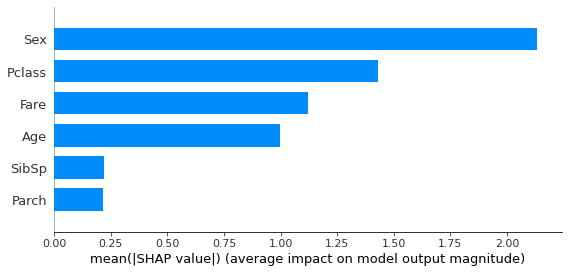

In [112]:
shap.summary_plot(shap_values, X_train, plot_type = 'bar')

As features estão ordenadas em quanto elas influenciam a predição do modelo. O eixo-X representa a média absoluta do SHAP value para cad afeature.

### Directionality impact

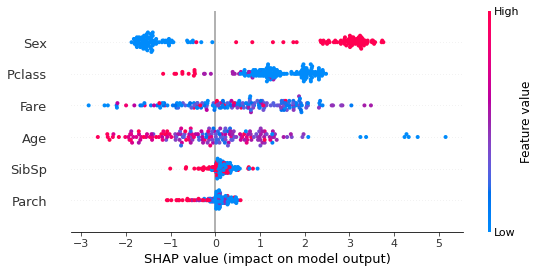

In [113]:
shap.summary_plot(shap_values, X_train)

Cada ponto no chart é um valor SHAP para a predição de uma feature. Vermelho significa alto valor da feature (no caso de "Sex" é 1 para female). Azul siginifica baixo valor (ou 0, para male). Podemos ter um senso de impacto de direcionalidae baseado na distribuição de vermelhos e azuis. No caso de 'Sex', azul tende a ter menos chance de sobreviver. Altos valores, '1' no caso, tende a ter mais chances de soberviver.Altos valores de 'Pclass' tende a não sobreviver (3º classe), enquanto baixos valores tende a sobreviver (1º classe).  